In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from sklearn import tree
cf.go_offline()
import missingno as msno
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
import pickle
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('diabetes-before_cleaning.csv')

In [3]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<AxesSubplot:>

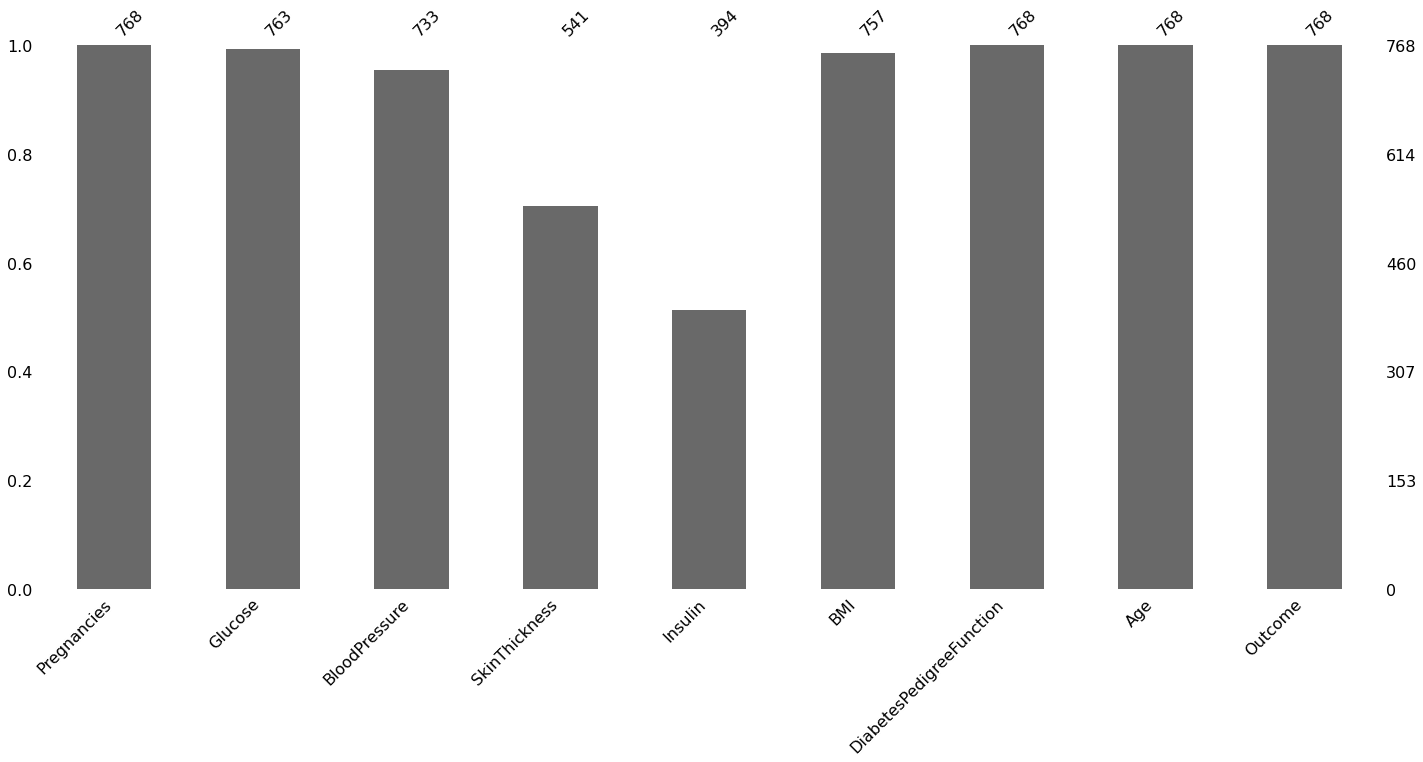

In [6]:
msno.bar(df1)

Text(0.5, 1.0, 'Heatmap for the Dataset')

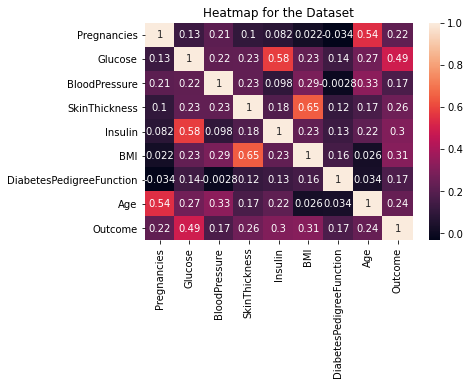

In [7]:
sns.heatmap(df1.corr(), annot = True)
plt.title('Heatmap for the Dataset')

In [8]:
def outcome_median(column_name):   
    median = df1[df1[column_name].notnull()]
    median = median[[column_name, 'Outcome']].groupby(['Outcome'])[[column_name]].median().reset_index()
    return median

In [9]:
outcome_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [10]:
df1.loc[(df1['Outcome']==0 )&(df1['Insulin'].isnull()),'Insulin']=102.5
df1.loc[(df1['Outcome']==1 )&(df1['Insulin'].isnull()),'Insulin']=169.5

In [11]:
outcome_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [12]:
df1.loc[(df1['Outcome']==0)&(df1['Glucose'].isnull()),'Glucose']=107
df1.loc[(df1['Outcome']==1)&(df1['Glucose'].isnull()),'Glucose']=140

In [13]:
outcome_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [14]:
df1.loc[(df1['Outcome']==0)&(df1['SkinThickness'].isnull()),'SkinThickness']=27
df1.loc[(df1['Outcome']==1)&(df1['SkinThickness'].isnull()),'SkinThickness']=32

In [15]:
outcome_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [16]:
df1.loc[(df1['Outcome']==0)&(df1['BloodPressure'].isnull()),'BloodPressure']=70
df1.loc[(df1['Outcome']==1)&(df1['BloodPressure'].isnull()),'BloodPressure']=74.5

In [17]:
outcome_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [18]:
df1.loc[(df1['Outcome']== 0 )&(df1['BMI'].isnull()),'BMI']=30.1
df1.loc[(df1['Outcome']==1 )&(df1['BMI'].isnull()),'BMI']=34.3

<AxesSubplot:>

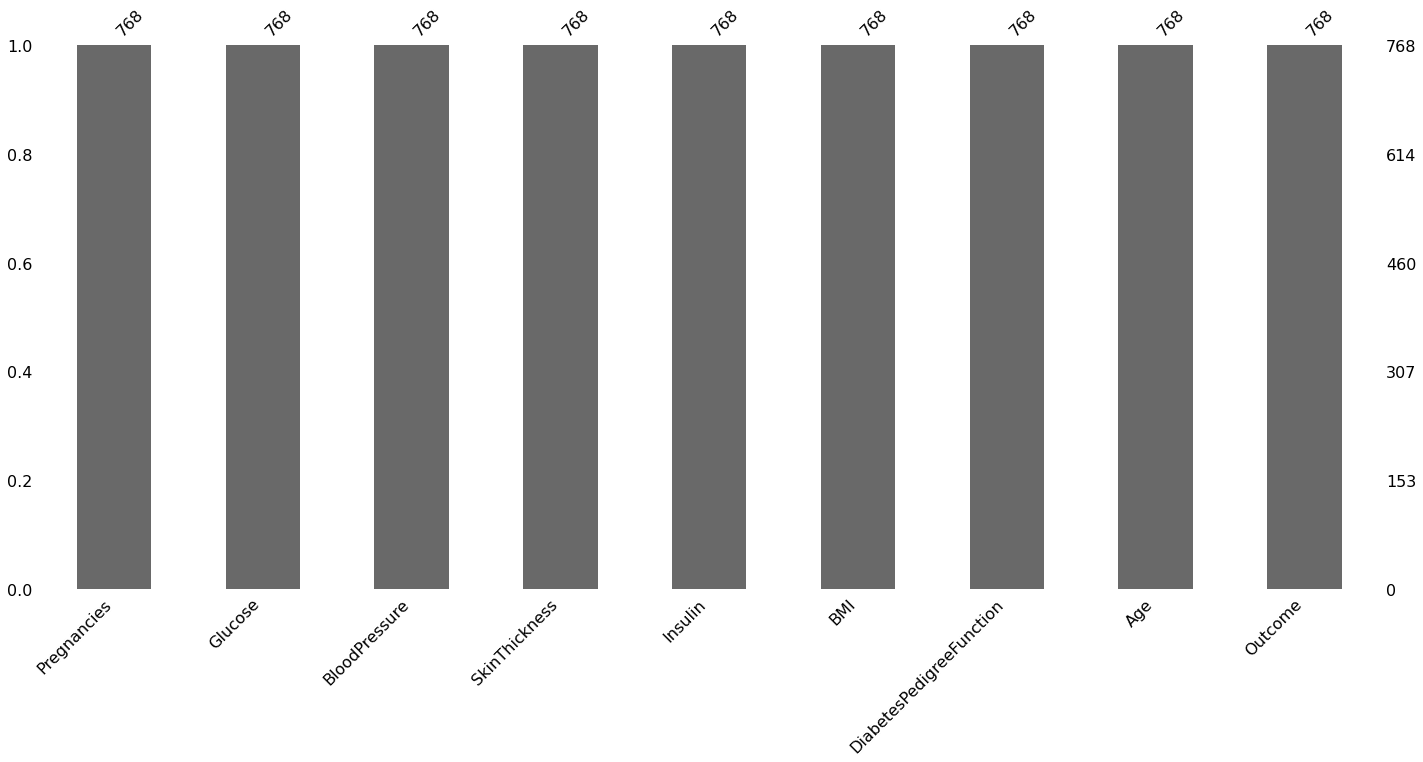

In [19]:
msno.bar(df1)

In [20]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis=1),df1['Outcome'],test_size=0.20,random_state=101)

In [21]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_expect=y_test
y_pred=clf.predict(X_test)
print(metrics.classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       103
           1       0.77      0.86      0.81        51

    accuracy                           0.87       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.88      0.87      0.87       154



In [22]:
LRModel=LogisticRegression()
LRModel.fit(X_train,y_train)
y_expect=y_test
y_pred=LRModel.predict(X_test)
print(metrics.classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.70      0.63      0.66        51

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



In [23]:
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_ranfor = accuracy_score(y_test, y_pred)

In [25]:
print(accuracy_ranfor*100)

78.57142857142857


In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_expect=y_test
y_pred1=nb.predict(X_test)
print(metrics.classification_report(y_expect,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.65      0.67      0.66        51

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154



In [28]:
accuracy_nb = accuracy_score(y_test, y_pred1)
print(accuracy_nb*100)

77.27272727272727


In [29]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train,y_train)

y_expect=y_test
y_pred=clf.predict(X_test)

print(metrics.classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       103
           1       0.80      0.76      0.78        51

    accuracy                           0.86       154
   macro avg       0.84      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



In [30]:
n = KNeighborsClassifier(n_neighbors = 3)
n.fit(X_train,y_train)

y_expect=y_test
y_pred=n.predict(X_test)

print(metrics.classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       103
           1       0.79      0.75      0.77        51

    accuracy                           0.85       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
n = KNeighborsClassifier(n_neighbors = 3)
n.fit(X_train_scaled,y_train)

y_expect=y_test
y_pred=n.predict(X_test_scaled)

print(metrics.classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       103
           1       0.55      0.59      0.57        51

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.71      0.70      0.70       154



In [32]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,max_iter=10,tol=0.001)
p.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(p.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(p.score(X_test, y_test)))

Accuracy on training set: 0.64
Accuracy on test set: 0.67


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,max_iter=10,tol=0.001)
p.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(p.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(p.score(X_test_scaled, y_test)))

Accuracy on training set: 0.62
Accuracy on test set: 0.60


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.loc[:, df1.columns != 'Outcome'], df1['Outcome'], stratify=df1['Outcome'], random_state=101)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.84
Accuracy on test set: 0.78


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=101)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.839


Hybrid Model

In [36]:
def get_stacking():
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('svm', svm.SVC()))
    level0.append(('dt', DecisionTreeClassifier()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=None)
    return model

In [37]:
HybridModel = get_stacking()
HybridModel.fit(X_train,y_train)

y_expect=y_test
y_pred=HybridModel.predict(X_test)

print(metrics.classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       125
           1       0.90      0.82      0.86        67

    accuracy                           0.91       192
   macro avg       0.91      0.89      0.89       192
weighted avg       0.91      0.91      0.91       192



<AxesSubplot:>

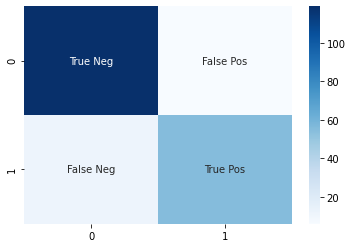

In [38]:
confusion_matrix(y_test, y_pred)
cf_matrix=confusion_matrix(y_test, y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [39]:
confusion_matrix(y_test, y_pred)

array([[119,   6],
       [ 12,  55]], dtype=int64)

In [40]:
filename = 'finalized_model.sav'
pickle.dump(HybridModel, open(filename, 'wb'))

In [41]:
loaded_model = pickle.load(open(filename, 'rb'))

y_expect=y_test
y_pred=loaded_model.predict(X_test)

print(metrics.classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       125
           1       0.90      0.82      0.86        67

    accuracy                           0.91       192
   macro avg       0.91      0.89      0.89       192
weighted avg       0.91      0.91      0.91       192

